In [1]:
import pandas as pd
import operator
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("Good_Book.csv")

In [3]:
new_df = df.drop(["Year", "New ROI", "Movie_Title", "IMDB_Rating", "Female_Male_Dialogues_Ratio", "#_of_Male_Crew", 
                  "#_of_Male_Cast", "#_of_Male_Dialogue", "Genre3_Tag_Male", "Genre2_Tag_Male", "Genre1_Tag_Male", 
                  "Sentiment_Male", "adjective_count_male", "noun_count_male", "verb_count_male"], axis = 1)

In [4]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 10 columns):
Genre1_Tag_Female         324 non-null float64
Genre2_Tag_Female         324 non-null float64
Genre3_Tag_Female         324 non-null float64
#_of_Female_Cast          324 non-null int64
#_of_Female_Dialogue      324 non-null int64
#_of_Female_Crew          324 non-null int64
Sentiment_Female          324 non-null float64
noun_count_female         324 non-null float64
verb_count_female         324 non-null float64
adjective_count_female    324 non-null float64
dtypes: float64(7), int64(3)
memory usage: 25.4 KB


In [5]:
scaler = StandardScaler()
scaler.fit(new_df)
X=scaler.transform(new_df)

c:\users\212687642\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\212687642\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [6]:
X.shape

(324, 10)

In [7]:
pca = PCA(n_components = 3, random_state = 42)
pcs = pca.fit_transform(X)

In [8]:
principalDff = pd.DataFrame(data = pcs, 
                           columns = ['PC1', 'PC2', 'PC3'])

In [9]:
principalDff.head()

,PC1,PC2,PC3
0,0.589271,0.532663,-0.243857
1,-0.667119,0.037531,-0.983292
2,0.980441,-1.062155,0.055965
3,-0.007363,-1.744460,1.473086
4,0.002730,-2.247867,-0.488119


In [10]:
pca.explained_variance_ratio_

array([0.29703094, 0.16405736, 0.14059241])

In [11]:
kmeans = KMeans(n_clusters = 2, random_state = 42).fit(principalDff)

In [12]:
y_kmeans = kmeans.predict(principalDff)

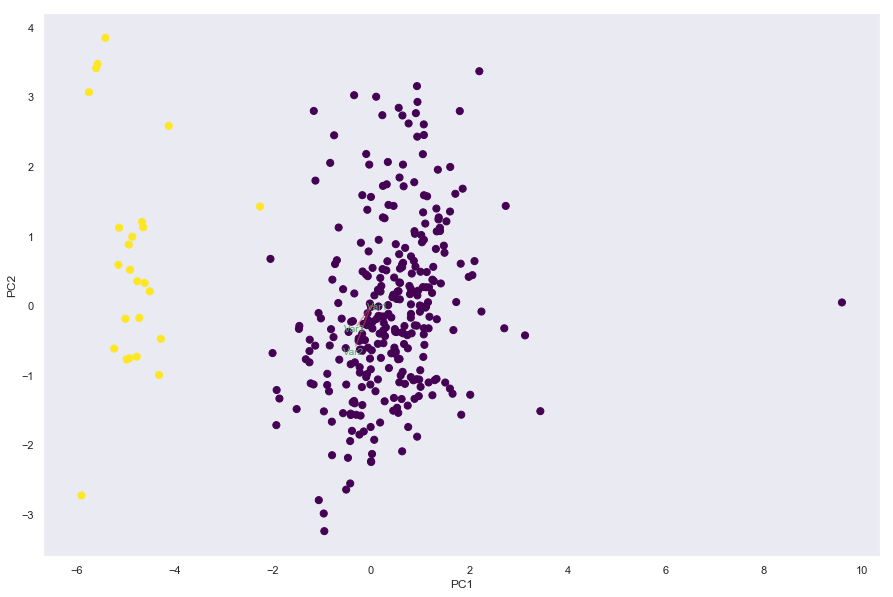

In [16]:
def myplot(score,coeff,labels=None):
    xs = score.iloc[:,0]
    ys = score.iloc[:,1]
    n = coeff.shape[0]

    plt.scatter(xs ,ys, c = y_kmeans, s = 50, cmap = 'viridis') #without scaling
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

plt.figure(figsize = [15, 10])
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. 
myplot(principalDff.iloc[:,0:2], pca.components_) 
plt.show()

In [17]:
kmeans.cluster_centers_

array([[ 0.40449628, -0.0590959 ,  0.0394394 ],
       [-4.83777554,  0.70678695, -0.47169528]])

In [18]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,